In [17]:
import numpy as np
from datasets import load_dataset
from PIL import Image
from logistic_regression import LogisticRegression, flatten

In [2]:
dataset = load_dataset("Bingsu/Cat_and_Dog")
dataset.set_format("np")

In [3]:
def reshape_example_image_array(example):
    image_array = example["image"]
    image = Image.fromarray(image_array, mode="RGB")
    image = image.resize((32, 32))
    reshaped_image_array = np.array(image)
    example["image"] = reshaped_image_array
    return example

In [4]:
m_train, m_test = 5000, 500
train, test = dataset["train"].select(range(m_train)), dataset["test"].select(range(m_test))
trainset = train.map(function=reshape_example_image_array)
testset = test.map(function=reshape_example_image_array)

In [5]:
def get_images_and_labels(dataset):
    inputs, labels = [], []
    for i in range(len(dataset)):
        inputs.append(dataset[i]["image"])
        labels.append(dataset[i]["labels"])
    return np.array(inputs), np.array(labels)

In [6]:
train_images, train_labels_1d = get_images_and_labels(trainset)
test_images, test_labels_1d = get_images_and_labels(testset)

print(f"train inputs shape: {train_images.shape} train labels shape: {train_labels_1d.shape}")
print(f"test inputs shape: {test_images.shape} test labels shape: {test_labels_1d.shape}")

train inputs shape: (5000, 32, 32, 3) train labels shape: (5000,)
test inputs shape: (500, 32, 32, 3) test labels shape: (500,)


In [7]:
def show_image(image_array):
    image = Image.fromarray(image_array, mode="RGB")
    return image

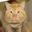

In [16]:
index = np.random.choice(len(train_images))
sample_image = train_images[index]
show_image(sample_image)

In [9]:
train_inputs_normalized, test_inputs_normalized =  train_images / 255.0, test_images / 255.0
print(f"train inputs mean: {train_inputs_normalized.mean():.3f} train inputs standard deviation: {train_inputs_normalized.std():.3f}")
print(f"test inputs mean: {test_inputs_normalized.mean():.3f} test inputs standard deviation: {test_inputs_normalized.std():.3f}")

print(f"train inputs min and max (respectively): {train_inputs_normalized.min()}, {train_inputs_normalized.max()}")
print(f"test inputs min and max (respectively): {test_inputs_normalized.min()}, {test_inputs_normalized.max()}")

train inputs mean: 0.452 train inputs standard deviation: 0.251
test inputs mean: 0.450 test inputs standard deviation: 0.250
train inputs min and max (respectively): 0.0, 1.0
test inputs min and max (respectively): 0.0, 1.0


In [10]:
train_inputs_flattened, test_inputs_flattened = flatten(train_inputs_normalized), flatten(test_inputs_normalized)
train_labels_2d, test_labels_2d = train_labels_1d.reshape(-1, 1), test_labels_1d.reshape(-1, 1)

print(f"train inputs shape: {train_inputs_flattened.shape} train labels shape: {train_labels_2d.shape}")
print(f"test inputs shape: {test_inputs_flattened.shape} test labels shape: {test_labels_2d.shape}")

train inputs shape: (5000, 3072) train labels shape: (5000, 1)
test inputs shape: (500, 3072) test labels shape: (500, 1)


In [11]:
def shuffle_arrays(inputs, labels):
    indices = np.arange(len(labels))
    np.random.shuffle(indices)
    shuffled_inputs, shuffled_labels = inputs[indices], labels[indices]
    return shuffled_inputs, shuffled_labels

In [12]:
train_inputs, train_labels = shuffle_arrays(train_inputs_flattened, train_labels_2d)
test_inputs, test_labels = shuffle_arrays(test_inputs_flattened, test_labels_2d)

In [13]:
model = LogisticRegression(32 * 32 * 3)

In [14]:
train_loss, train_losses = model.train(train_inputs, train_labels, iterations=5000, learning_rate=5e-2, verbose=True)

training started


training complete with average loss: 1.1022


In [15]:
test_loss, accuracy = model.test(test_inputs, test_labels, verbose=True)

testing started
testing complete with average loss: 0.0226 and accuracy: 0.9980
